# Capstone Project TrashGu
- **ID Group Team:** CC25-CF125
- **Anggota Team:**
1. (ML) MC299D5X1601 - Agistia Ronna Aniqa
2. (ML) MC299D5X1752 - Evi Afiyatus Solihah
3. (ML) MC299D5X1751 - Rahmah Fauziah
4. (FEBE) FC265D5Y1786 - Fajar Anugrah
5. (FEBE) FC265D5Y1103 - M Reza Pahlevi
6. (FEBE) FC265D5Y1796 - Pebri Andika

## Install PIP

In [ ]:
# Menginstal berbagai library Python yang dibutuhkan
!pip install tensorflow tensorflowjs keras opendatasets pandas numpy matplotlib Pillow scipy scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Import Semua Packages/Library yang Digunakan

In [ ]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import uuid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm as tq

# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image, ImageOps
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# menonaktifkan warning yang mungkin muncul, seperti warning FutureWarning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"agistronna","key":"a523f361eda1a2a5e24437e94612ea08"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mostafaabla/garbage-classification
!unzip garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classification/pa

In [ ]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sumn2u/garbage-classification-v2
!unzip garbage-classification-v2.zip

Streaming output truncated to the last 5000 lines.
  inflating: garbage-dataset/paper/paper_847.jpg  
  inflating: garbage-dataset/paper/paper_848.jpg  
  inflating: garbage-dataset/paper/paper_849.jpg  
  inflating: garbage-dataset/paper/paper_851.jpg  
  inflating: garbage-dataset/paper/paper_852.jpg  
  inflating: garbage-dataset/paper/paper_853.jpg  
  inflating: garbage-dataset/paper/paper_855.jpg  
  inflating: garbage-dataset/paper/paper_856.jpg  
  inflating: garbage-dataset/paper/paper_857.jpg  
  inflating: garbage-dataset/paper/paper_859.jpg  
  inflating: garbage-dataset/paper/paper_861.jpg  
  inflating: garbage-dataset/paper/paper_863.jpg  
  inflating: garbage-dataset/paper/paper_865.jpg  
  inflating: garbage-dataset/paper/paper_868.jpg  
  inflating: garbage-dataset/paper/paper_870.jpg  
  inflating: garbage-dataset/paper/paper_871.jpg  
  inflating: garbage-dataset/paper/paper_873.jpg  
  inflating: garbage-dataset/paper/paper_874.jpg  
  inflating: garbage-dataset/pa

In [ ]:
# Lokasi folder asal dan target
base_path = "/content/garbage_classification"
target_folder = os.path.join(base_path, "glass")
os.makedirs(target_folder, exist_ok=True)

# Folder-foler glass varian
glass_variants = ["brown-glass", "green-glass", "white-glass"]

# Gabungkan isi semua varian ke folder "glass"
for variant in glass_variants:
    variant_path = os.path.join(base_path, variant)
    for filename in os.listdir(variant_path):
        src = os.path.join(variant_path, filename)

        if not os.path.isfile(src):
            continue

        dst = os.path.join(target_folder, filename)

        # Hindari overwrite
        if os.path.exists(dst):
            base, ext = os.path.splitext(filename)
            i = 1
            while os.path.exists(dst):
                dst = os.path.join(target_folder, f"{base}_{i}{ext}")
                i += 1

        shutil.copy2(src, dst)

print("Penyatuan folder glass selesai.")

Penyatuan folder glass selesai.


In [ ]:
folders_to_delete = ["brown-glass", "green-glass", "white-glass"]
base_path = "/content/garbage_classification"

for folder in folders_to_delete:
    full_path = os.path.join(base_path, folder)
    if os.path.exists(full_path):
        shutil.rmtree(full_path)
        print(f"Folder '{folder}' dihapus.")
    else:
        print(f"Folder '{folder}' tidak ditemukan.")

Folder 'brown-glass' dihapus.
Folder 'green-glass' dihapus.
Folder 'white-glass' dihapus.


In [ ]:
# Path dua folder utama yang akan digabung
source_dirs = ["/content/garbage_classification", "/content/garbage-dataset"]
target_dir = "/content/combined_dataset"

# Buat folder gabungan
os.makedirs(target_dir, exist_ok=True)

# Gabungkan semua folder label
for src_dir in source_dirs:
    for label in os.listdir(src_dir):
        src_label_path = os.path.join(src_dir, label)

        if not os.path.isdir(src_label_path):
            continue  # Lewati file jika ada

        dst_label_path = os.path.join(target_dir, label)
        os.makedirs(dst_label_path, exist_ok=True)

        for filename in os.listdir(src_label_path):
            src_file = os.path.join(src_label_path, filename)

            if not os.path.isfile(src_file):
                continue

            dst_file = os.path.join(dst_label_path, filename)

            # Hindari overwrite jika nama file sama
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(filename)
                i = 1
                while os.path.exists(dst_file):
                    dst_file = os.path.join(dst_label_path, f"{base}_{i}{ext}")
                    i += 1

            shutil.copy2(src_file, dst_file)

print("Penggabungan selesai. Folder gabungan ada di:", target_dir)

Penggabungan selesai. Folder gabungan ada di: /content/combined_dataset


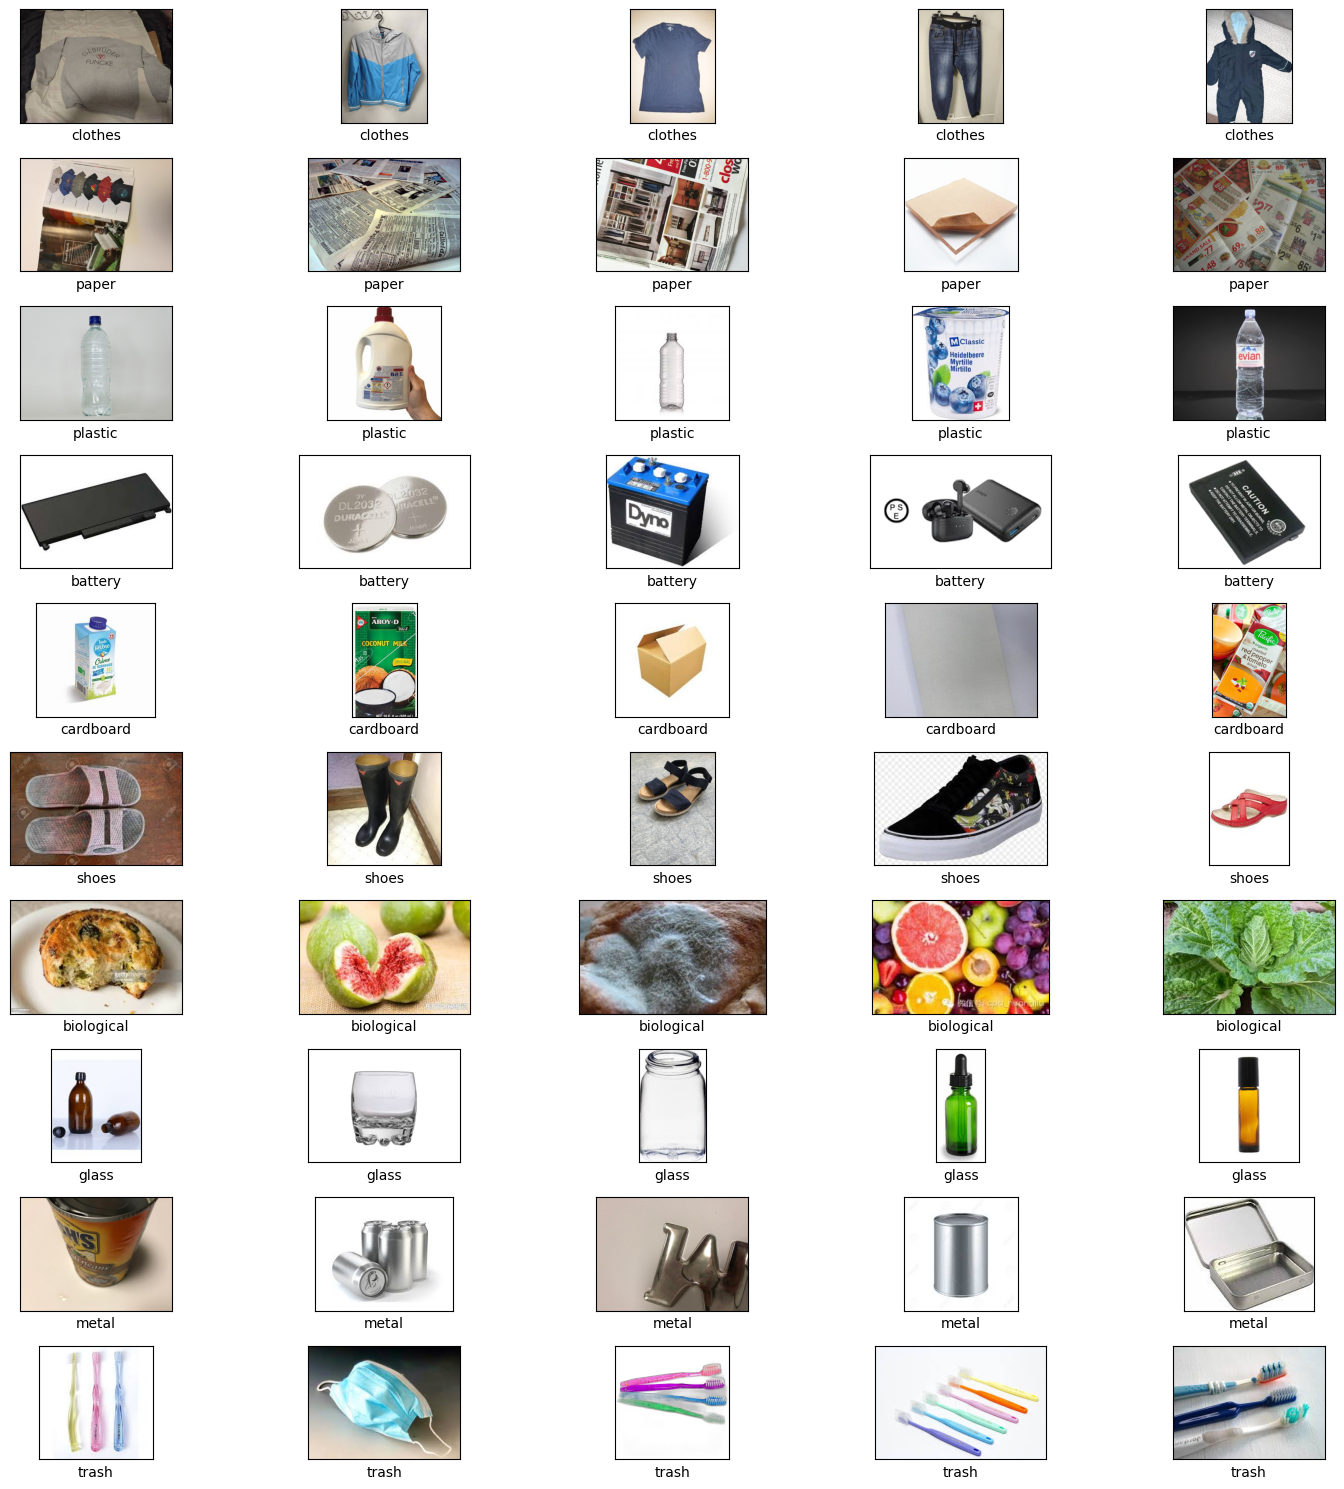

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "/content/combined_dataset"
for i in os.listdir(path):
    lung_image[i] = os.listdir(os.path.join(path, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
path = "/content/combined_dataset"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

In [ ]:
import glob

base_dir = "/content/combined_dataset"
data = []

for label in os.listdir(base_dir):
    label_folder = os.path.join(base_dir, label)
    if not os.path.isdir(label_folder):
        continue
    for file in os.listdir(label_folder):
        if file.endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(label_folder, file)
            data.append({'path': path, 'file_name': file, 'labels': label})

distribution_train = pd.DataFrame(data)

In [ ]:
# --- Fungsi augmentasi sederhana ---
def augment_and_save(src_path, save_dir):
    img = Image.open(src_path)

    # Pilih augmentasi secara acak
    op = random.choice(['flip', 'rotate'])
    if op == 'flip':
        aug = ImageOps.mirror(img)
    else:
        angle = random.choice([90, 180, 270])
        aug = img.rotate(angle, expand=True)

    # Konversi ke RGB jika bukan RGB
    if aug.mode != 'RGB':
        aug = aug.convert("RGB")

    # Simpan dengan nama unik
    new_name = f"{uuid.uuid4().hex}.png"
    save_path = os.path.join(save_dir, new_name)
    aug.save(save_path)

    return new_name, save_path

# --- Hitung target balancing ---
class_counts = distribution_train['labels'].value_counts()
min_count    = class_counts.min()
target = min(min_count * 5, 5000)

# Folder output
output_dir = "/content/balanced_dataset"
os.makedirs(output_dir, exist_ok=True)

# DataFrame baru untuk menyimpan path hasil oversampling+augmentasi
new_rows = []

for label, group in distribution_train.groupby('labels'):
    label_folder = os.path.join(output_dir, label)
    os.makedirs(label_folder, exist_ok=True)

    if len(group) > target:
        # Undersample: ambil random subset
        sampled = group.sample(n=target, random_state=42)
        for _, row in tqdm(sampled.iterrows(), total=len(sampled), desc=f"Copying {label}"):
            dst = os.path.join(label_folder, row['file_name'])
            shutil.copyfile(row['path'], dst)
            new_rows.append({'path': dst, 'file_name': row['file_name'], 'labels': label})
    else:
        # Oversample + augmentasi
        repeats = target // len(group)
        rem     = target % len(group)

        # Ulangi full group beberapa kali
        for _ in range(repeats):
            for _, row in tqdm(group.iterrows(), total=len(group), desc=f"Augmenting {label} (repeat)"):
                fn, saved = augment_and_save(row['path'], label_folder)
                new_rows.append({'path': saved, 'file_name': fn, 'labels': label})

        # Ambil sisanya secara acak dan augment
        extra = group.sample(n=rem, random_state=42)
        for _, row in tqdm(extra.iterrows(), total=len(extra), desc=f"Augmenting {label} (extra)"):
            fn, saved = augment_and_save(row['path'], label_folder)
            new_rows.append({'path': saved, 'file_name': fn, 'labels': label})

# Gabungkan semua metadata jadi DataFrame
balanced_df = pd.DataFrame(new_rows)

Augmenting trash (extra): 100%|██████████| 68/68 [00:00<00:00, 78.20it/s]


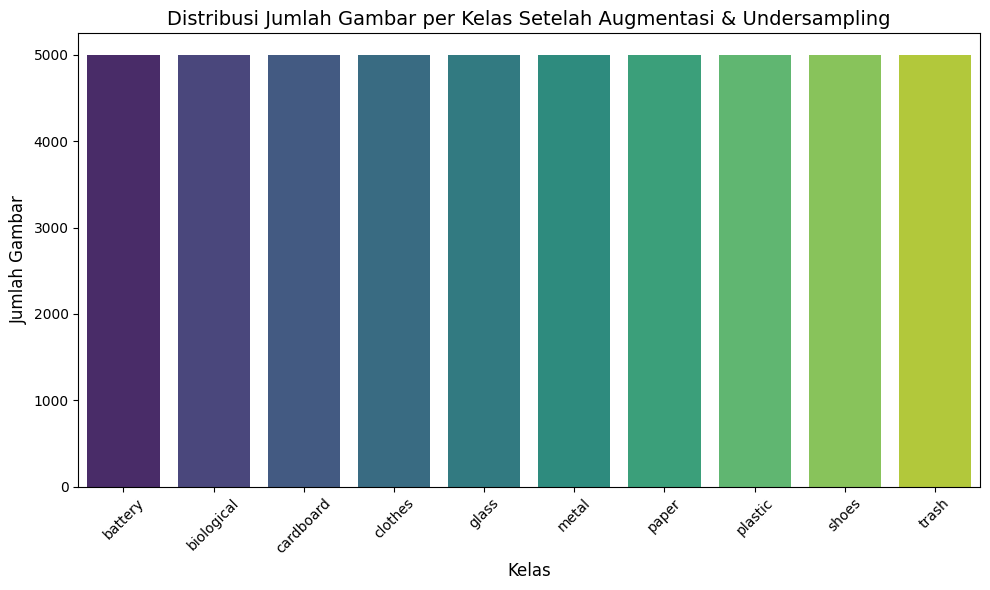

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah gambar per kelas setelah proses oversampling + undersampling
class_counts_after = balanced_df['labels'].value_counts()

# Membuat plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='viridis')

# Menambahkan label dan judul
plt.title("Distribusi Jumlah Gambar per Kelas Setelah Augmentasi & Undersampling", fontsize=14)
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45)  # Rotasi label kelas jika terlalu panjang

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# --- Cek jumlah di folder ---
print("\nJumlah gambar per kelas di folder:")
for label in sorted(os.listdir(output_dir)):
    cnt = len(os.listdir(os.path.join(output_dir, label)))
    print(f"  {label}: {cnt} gambar")


Jumlah gambar per kelas di folder:
  battery: 5000 gambar
  biological: 5000 gambar
  cardboard: 5000 gambar
  clothes: 5000 gambar
  glass: 5000 gambar
  metal: 5000 gambar
  paper: 5000 gambar
  plastic: 5000 gambar
  shoes: 5000 gambar
  trash: 5000 gambar


### Split Dataset

In [ ]:
# Splitting dataset (Train, Val, Test) dengan proporsi 80:10:10
dataset_path = '/content/balanced_dataset'
base_output = 'split_dataset'

split_ratio = {
    'train': 0.8,
    'val': 0.1,
    'test': 0.1
}

# Buat direktori output
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(dataset_path):
        class_split_path = os.path.join(base_output, split, class_name)
        os.makedirs(class_split_path, exist_ok=True)

# Proses untuk setiap kelas
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        all_images = os.listdir(class_path)
        random.shuffle(all_images)

        total = len(all_images)
        train_end = int(total * split_ratio['train'])
        val_end = train_end + int(total * split_ratio['val'])

        train_imgs = all_images[:train_end]
        val_imgs = all_images[train_end:val_end]
        test_imgs = all_images[val_end:]

        # Copy ke folder tujuan
        for img_list, split in zip([train_imgs, val_imgs, test_imgs], ['train', 'val', 'test']):
            for img in img_list:
                src = os.path.join(class_path, img)
                dst = os.path.join(base_output, split, class_name, img)
                shutil.copyfile(src, dst)

In [ ]:
for split in ['train', 'val', 'test']:
    total = 0
    print(f"\nJumlah gambar di {split}:")
    split_path = os.path.join(base_output, split)
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        num_images = len(os.listdir(class_dir))
        total += num_images
        print(f"  {class_name}: {num_images} gambar")
    print(f"Total {split}: {total} gambar")


Jumlah gambar di train:
  clothes: 4000 gambar
  paper: 4000 gambar
  plastic: 4000 gambar
  battery: 4000 gambar
  cardboard: 4000 gambar
  shoes: 4000 gambar
  biological: 4000 gambar
  glass: 4000 gambar
  metal: 4000 gambar
  trash: 4000 gambar
Total train: 40000 gambar

Jumlah gambar di val:
  clothes: 500 gambar
  paper: 500 gambar
  plastic: 500 gambar
  battery: 500 gambar
  cardboard: 500 gambar
  shoes: 500 gambar
  biological: 500 gambar
  glass: 500 gambar
  metal: 500 gambar
  trash: 500 gambar
Total val: 5000 gambar

Jumlah gambar di test:
  clothes: 500 gambar
  paper: 500 gambar
  plastic: 500 gambar
  battery: 500 gambar
  cardboard: 500 gambar
  shoes: 500 gambar
  biological: 500 gambar
  glass: 500 gambar
  metal: 500 gambar
  trash: 500 gambar
Total test: 5000 gambar


In [ ]:
# Detail komposisi Splitting Data
base_dir = 'split_dataset'
img_size = (150, 150)
batch_size = 32

#Training set
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Validation set
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'val'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

#Test set
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 40000 files belonging to 10 classes.
Found 5000 files belonging to 10 classes.
Found 5000 files belonging to 10 classes.


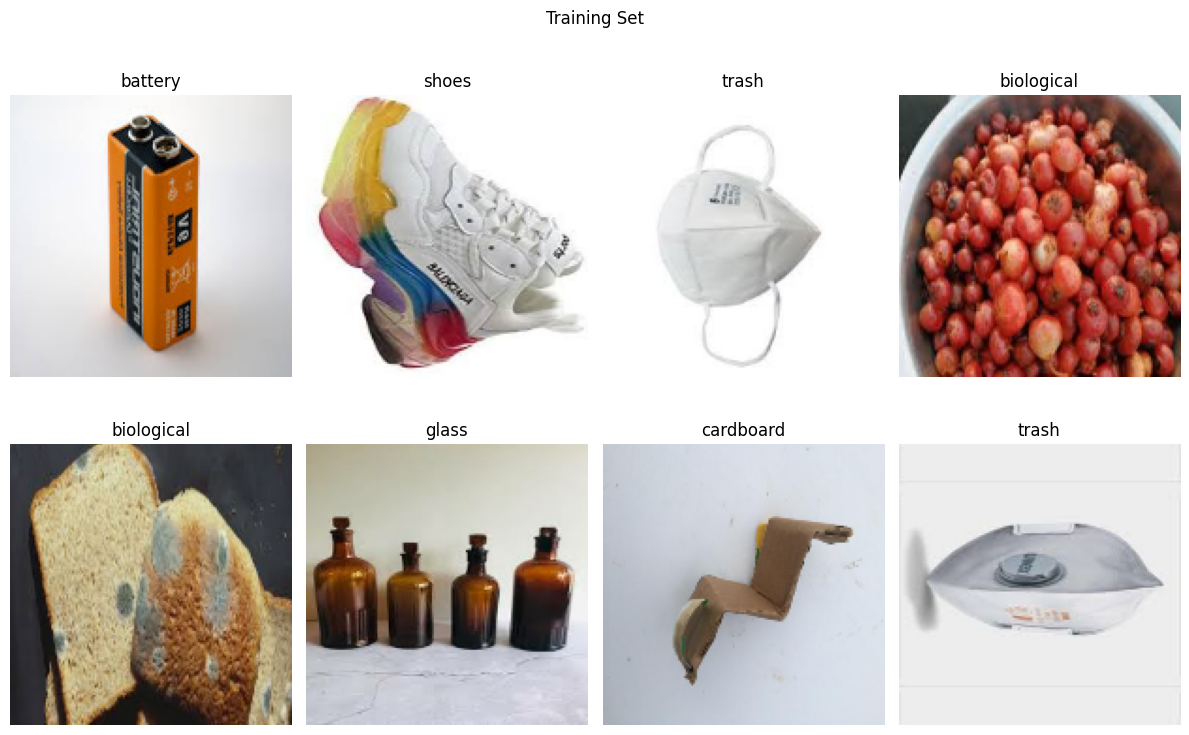

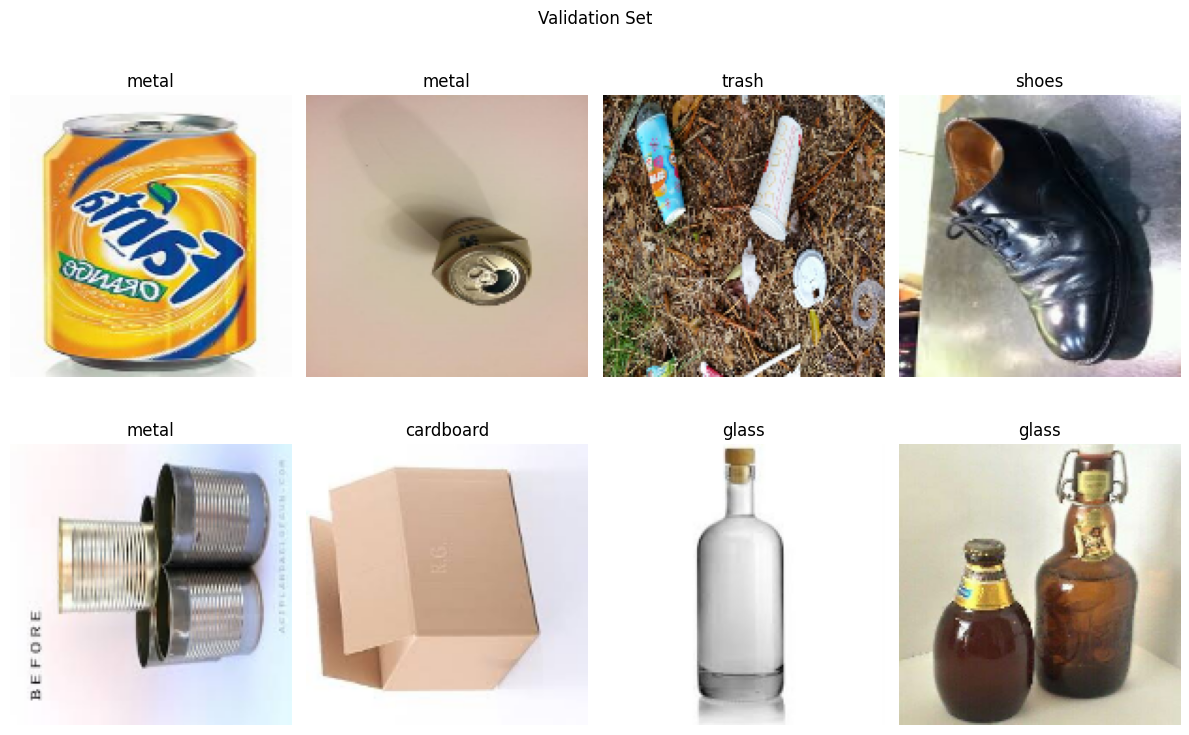

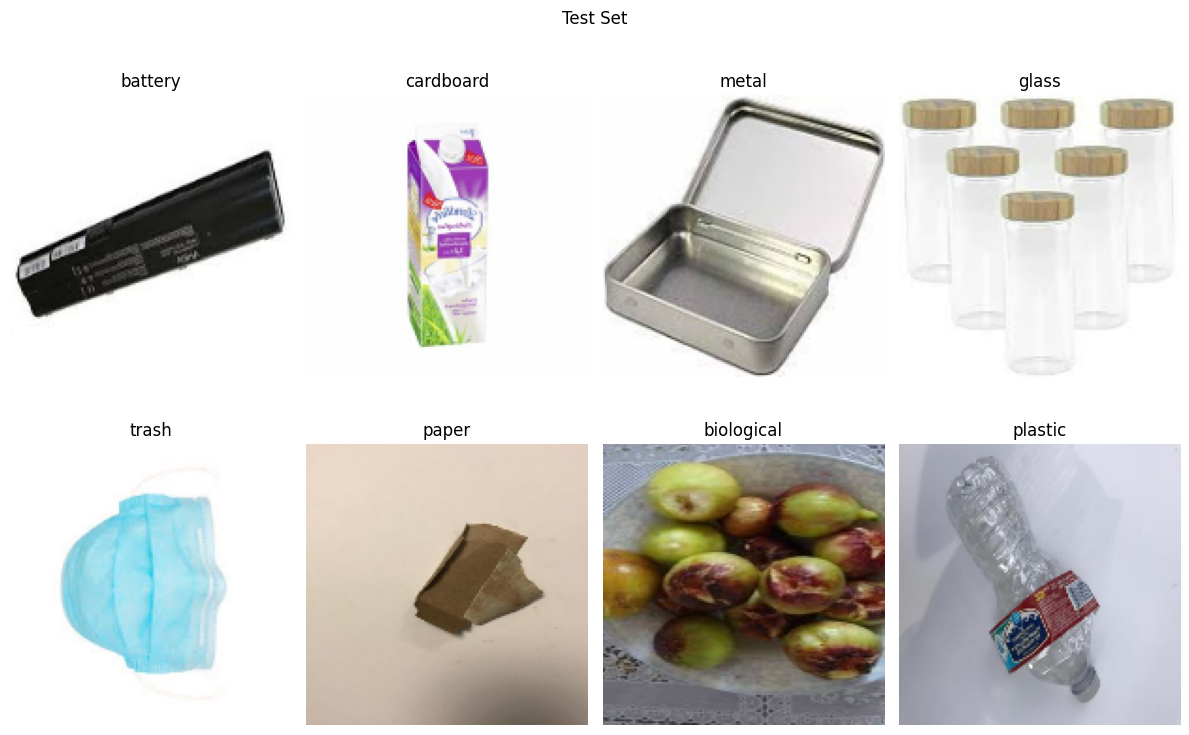

In [ ]:
# Visualisasi sample foto pada masing masing split
class_names = train_ds.class_names

def show_images(dataset, title="Split Preview"):
    plt.figure(figsize=(12, 8))
    for images, labels in dataset.take(1):
        for i in range(8):
            ax = plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            label_index = tf.argmax(labels[i]).numpy()
            plt.title(class_names[label_index])
            plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_images(train_ds, title="Training Set")
show_images(val_ds, title="Validation Set")
show_images(test_ds, title="Test Set")

## Modelling

### Augmentasi dan Load Dataset (Train, Validation, Test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Gunakan mixed precision untuk menghemat RAM
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Buat model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Dropout sedikit lebih kecil

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 kelas
])

# Compile model dengan optimasi RAM
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Gunakan learning rate decay untuk menghemat resource training
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Tampilkan arsitektur
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414,410 (1.58 MB)

 Trainable params: 413,514 (1.58 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Callback
checkpoint = ModelCheckpoint("saved_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stop]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 146ms/step - accuracy: 0.3837 - loss: 1.8101 - val_accuracy: 0.4296 - val_loss: 1.6662
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.5579 - loss: 1.3288 - val_accuracy: 0.5238 - val_loss: 1.4250
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 136ms/step - accuracy: 0.6199 - loss: 1.1467 - val_accuracy: 0.4492 - val_loss: 2.0253
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.6659 - loss: 1.0113 - val_accuracy: 0.6120 - val_loss: 1.1408
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - accuracy: 0.7016 - loss: 0.8997 - val_accuracy: 0.5464 - val_loss: 1.4321
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 173s 138ms/step - accuracy: 0.7337 - loss: 0.8113 - val_accuracy: 0.6042 - val_loss: 1.1776
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - accuracy: 0.7570 - loss: 0.7381 - val_accuracy: 0.6352 - val_loss: 1.0923
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - ac

### Membangun dan Melatih Model

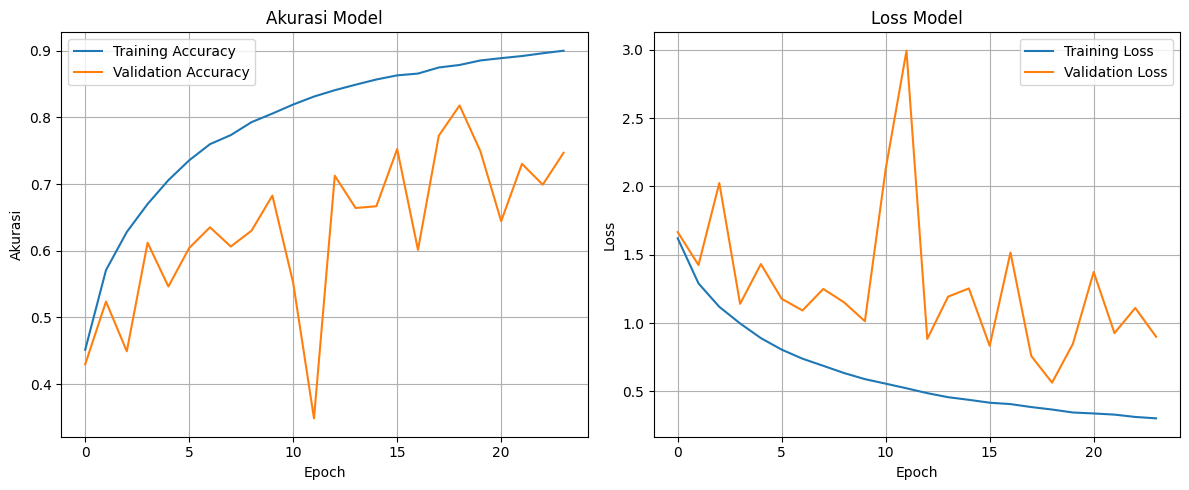

In [ ]:
# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(train_ds)
print(f"Akurasi di train set: {train_acc:.2%}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 119ms/step - accuracy: 0.8566 - loss: 0.4356
Akurasi di train set: 85.55%


In [ ]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Akurasi di val set: {val_acc:.2%}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.8117 - loss: 0.5774
Akurasi di val set: 81.80%


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Akurasi di test set: {test_acc:.2%}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.8140 - loss: 0.5916
Akurasi di test set: 81.18%


In [ ]:
# Konversi model ke Saved_model
model.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float16, name=None)
Captures:
  132432713706832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713708560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713708752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713707984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713707024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713708368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713710288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713710864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713711440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713709520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132432713707600

In [ ]:
# Install TensorFlow.js converter
!pip install tensorflowjs

In [ ]:
# Import library tensorflowjs
import tensorflowjs as tfjs

# Buat direktori untuk menyimpan model TFJS
!mkdir -p tfjs_model

# Simpan model ke format TFJS
tfjs.converters.save_keras_model(model2, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
from google.colab import files

# Zip semua model yang disimpan
!zip -r model_artifacts.zip saved_model tfjs_model tflite
# Download hasil zip
files.download("model_artifacts.zip")

	zip warning: name not matched: tflite
  adding: saved_model/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 69%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/saved_model.pb (deflated 87%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 9%)
  adding: tfjs_model/model.json (deflated 89%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load model dari folder SavedModel
model = tf.saved_model.load("saved_model")

In [ ]:
# Upload file gambar (misal .jpg)
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving Kertas_Art_Paper.jpg to Kertas_Art_Paper.jpg


In [ ]:
# # Load gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan batch dimension

# Prediksi
predictions = model2.predict(img_array)

# Melihat probabilitas untuk setiap kelas
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[5.960e-08 1.788e-07 8.862e-02 0.000e+00 7.749e-07 1.006e-04 9.092e-01
  4.687e-04 0.000e+00 1.090e-03]]


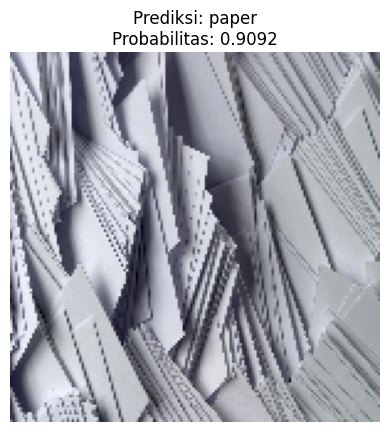

In [ ]:
# Menentukan label untuk setiap kelas
class_labels = ['battery', 'cardboard', 'metal', 'gelas', 'biological', 'clothes', 'paper', 'plastic', 'shoes', 'trash']  # Ganti dengan label kelas yang sesuai

# Mengambil kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions, axis=1)
predicted_label = class_labels[predicted_class[0]]

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title(f"Prediksi: {predicted_label}\nProbabilitas: {predictions[0][predicted_class[0]]:.4f}")
plt.show()

## Menyimpan Model

## Inference